In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import sklearn.cluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data.csv', index_col=0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)
IDS = df_scaled['ID']
df_scaled.drop(['ID'], inplace = True, axis=1)

In [3]:
pca = PCA(n_components=7)
principal_components = pca.fit_transform(df_scaled)
print(pca.explained_variance_)
df_pca = pd.DataFrame(principal_components, columns=['pca1', 'pca2', 'pca3', 'pca4', 
                                                     'pca5', 'pca6', 'pca7'])

[0.77027329 0.26559467 0.17640023 0.10656711 0.07643478 0.07479057
 0.03922567]


In [5]:
for eps in [0.2, 0.25, 0.28, 0.30, 0.35]:
    for min_s in [15, 17, 19, 22, 25]:
        est_dbscan = DBSCAN(eps=eps, min_samples=min_s)
        est_dbscan.fit(df_pca)
        print("EPS: {}, MIN_SAMPLE {}, {}".format(eps, min_s,
                                    silhouette_score(df_scaled, est_dbscan.labels_)))

EPS: 0.2, MIN_SAMPLE 15, -0.1869359996151717
EPS: 0.2, MIN_SAMPLE 17, -0.16759585821982464
EPS: 0.2, MIN_SAMPLE 19, -0.2173351910035472
EPS: 0.2, MIN_SAMPLE 22, -0.11936531330028984
EPS: 0.2, MIN_SAMPLE 25, -0.1105914961339661
EPS: 0.25, MIN_SAMPLE 15, 0.020336130534418833
EPS: 0.25, MIN_SAMPLE 17, -0.07882488012519194
EPS: 0.25, MIN_SAMPLE 19, -0.013699088736421575
EPS: 0.25, MIN_SAMPLE 22, 0.08744345584290553
EPS: 0.25, MIN_SAMPLE 25, -0.000881245667701518
EPS: 0.28, MIN_SAMPLE 15, 0.1888508085038652
EPS: 0.28, MIN_SAMPLE 17, 0.10032136758996933
EPS: 0.28, MIN_SAMPLE 19, 0.10049425982754563
EPS: 0.28, MIN_SAMPLE 22, 0.05128258301759307
EPS: 0.28, MIN_SAMPLE 25, 0.10400024000298268
EPS: 0.3, MIN_SAMPLE 15, 0.21026581196557972
EPS: 0.3, MIN_SAMPLE 17, 0.09208329293314058
EPS: 0.3, MIN_SAMPLE 19, 0.20001618066160468
EPS: 0.3, MIN_SAMPLE 22, 0.12226020063683611
EPS: 0.3, MIN_SAMPLE 25, 0.1196769498036405
EPS: 0.35, MIN_SAMPLE 15, 0.2683946717146196
EPS: 0.35, MIN_SAMPLE 17, 0.26255846338

In [13]:
df_without_gk = df_scaled[df_scaled.Position != 0]
df_without_gk.drop(['GKDiving', 'GKReflexes', 'GKHandling', 'GKKicking', 'GKPositioning'],
                   axis=1, inplace=True)
df_without_gk.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,LongOfCountry,LatitOfCountry,ID
0,0.517241,1.000000,0.978723,0.932489,1.000000,0.0,1.00,0.75,0.75,0.904762,...,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.992982,0.166224,0.056089,158023
1,0.586207,1.000000,0.978723,0.649789,0.716814,1.0,1.00,0.75,1.00,1.000000,...,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.556959,0.366432,0.733595,20801
2,0.344828,0.958333,0.957447,1.000000,0.513274,1.0,1.00,1.00,1.00,0.833333,...,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909,1.000000,0.208709,0.278433,190871
4,0.379310,0.937500,0.936170,0.860759,0.628319,1.0,0.75,1.00,0.75,0.476190,...,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455,0.860947,0.410725,0.833022,192985
5,0.379310,0.937500,0.914894,0.784810,0.601770,1.0,0.75,0.75,0.75,0.904762,...,0.940476,0.931034,0.946237,0.340659,0.274725,0.215909,0.754354,0.410725,0.833022,183277


In [31]:
est_dbscan = DBSCAN(eps=0.20, min_samples=15)
est_dbscan.fit(df_scaled)
print(max(est_dbscan.labels_))
#print(silhouette_score(df_without_gk, est_dbscan.labels_))

-1


In [41]:
est_dbscan = DBSCAN(eps=0.20, min_samples=25)
est_dbscan.fit(df_pca)
print(max(est_dbscan.labels_))
print(silhouette_score(df_pca, est_dbscan.labels_))

6
0.39802594771035643


In [6]:
est_dbscan = DBSCAN(eps=0.35, min_samples=15)
est_dbscan.fit(df_pca)
print(max(est_dbscan.labels_))
print(silhouette_score(df_pca, est_dbscan.labels_))

2
0.3160313717279465


In [32]:
est_dbscan = DBSCAN(eps=0.20, min_samples=15)
est_dbscan.fit(df_without_gk)
print(max(est_dbscan.labels_))
#print(silhouette_score(df_without_gk, est_dbscan.labels_))

-1


In [25]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

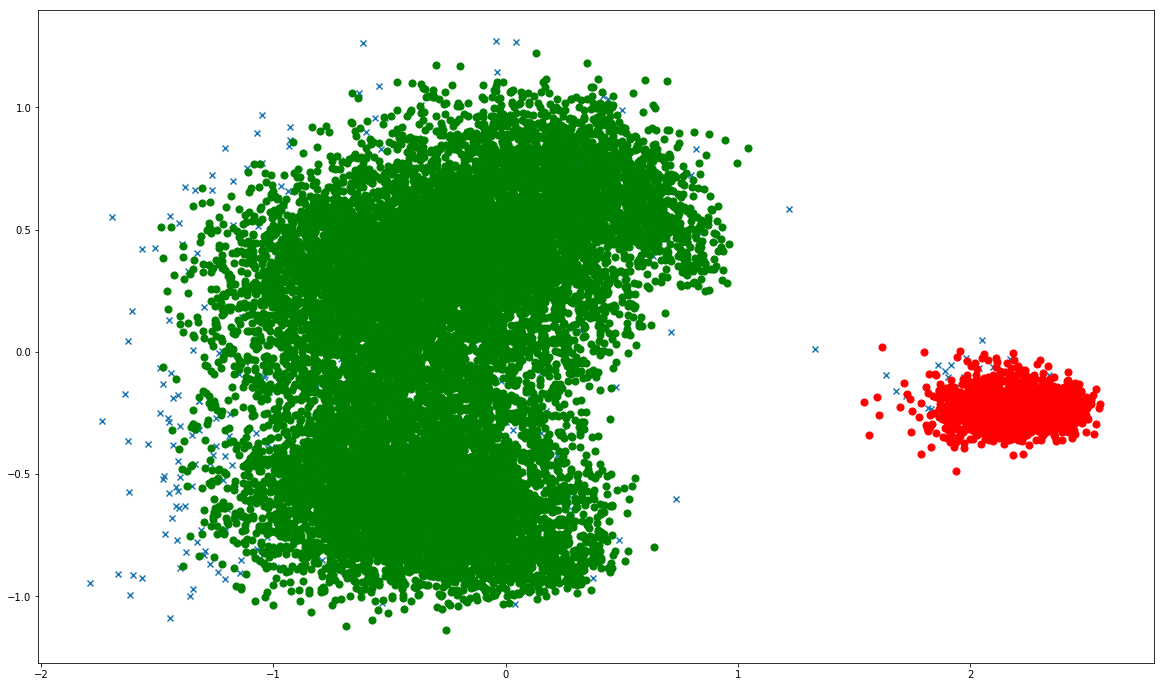

In [7]:
fig = plt.figure(figsize=(20,12))
df['Labels'] = est_dbscan.labels_
df_pca['Labels'] = est_dbscan.labels_
colors = ['Red', 'Green', 'Blue', 'Yellow', 'Pink', 'Black', 'Purple', 'Orange', 'Grey']
for j in range(-1, max(est_dbscan.labels_)):
    if j == -1:
        noise = df_pca[df_pca['Labels'] == -1]
        plt.scatter(noise['pca1'], noise['pca2'], marker='x')
    else:
        cluster = df_pca[df_pca['Labels'] == j]
        plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=50)
        
        
plt.savefig('../dbscan_pca_035_15')

IndexError: list index out of range

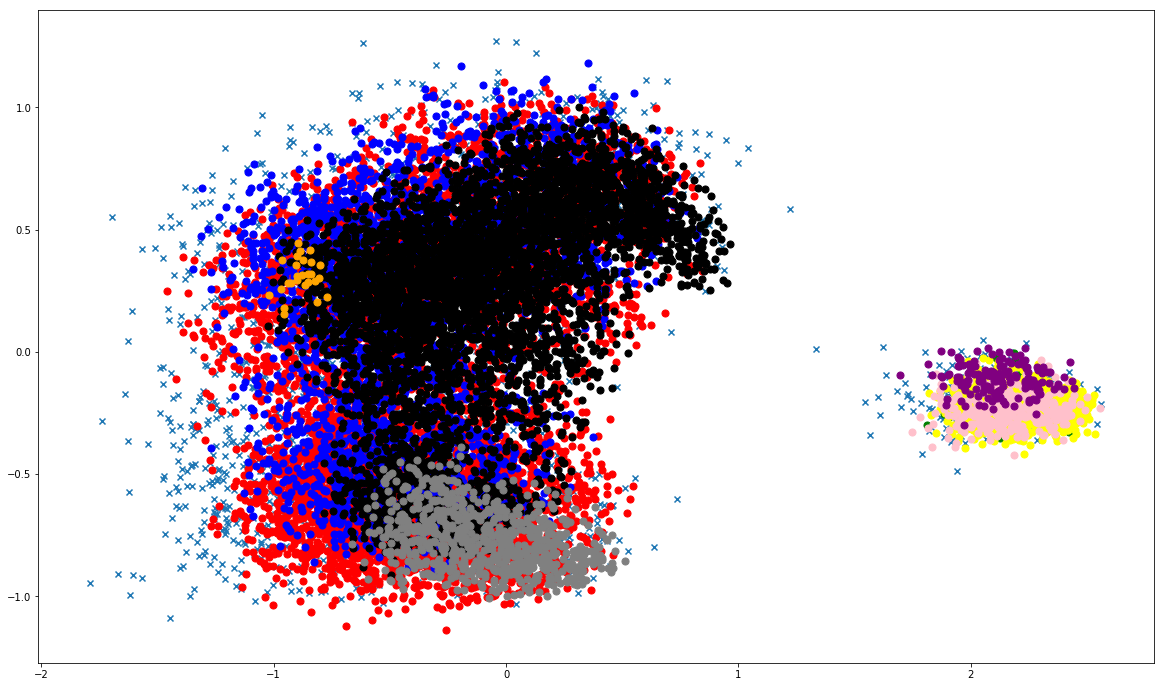

In [51]:
fig = plt.figure(figsize=(20,12))
for j in range(-1, max(est_dbscan.labels_)):
    if j == -1:
        noise = df_pca[df_pca['Labels'] == -1]
        plt.scatter(noise['pca1'], noise['pca2'], marker='x')
    else:
        cluster = df_pca[df_pca['Labels'] == j]
        plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=50)